In [1]:
import numpy as np
import pickle

import umap.umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *

/home/sanseng01/.conda/envs/hyun_ml/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Load

In [2]:
gene_names = np.load('npy_data/rna_geo_gene_names.npy', allow_pickle=True)
X_test = np.load('npy_data/rna_geo_x_test_standardScaled.npy', allow_pickle=True)
Y_test = np.load('npy_data/rna_geo_y_test.npy', allow_pickle=True)

# Evaluation

In [3]:
model_dir = './checkpoints/'
model_path = 'sample_weights.pkl'
with open(model_dir + model_path , 'rb') as f:
    data = pickle.load(f)

vae_model = data['model']
x_syn = data['x_syn']
y_syn = data['y_syn']

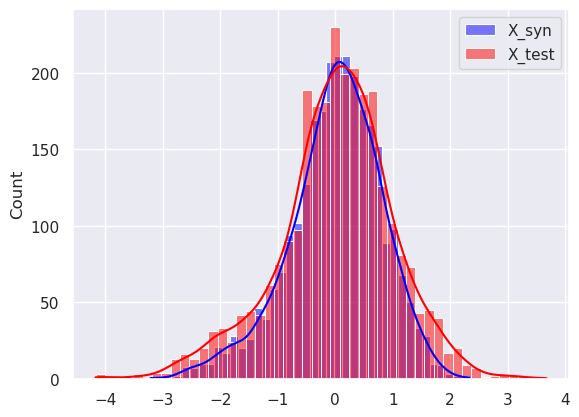

In [4]:
sns.set(style="darkgrid")

sns.histplot(x_syn[:,0], kde=True, color="blue", label="X_syn")
sns.histplot(X_test[:,0], kde=True, color="red", label="X_test")
# sns.histplot(X_train[:,1], kde=True, color="yellow", label="X_train")

plt.legend()
plt.show()

In [5]:
print(x_syn.shape)
print(f'gamma score : {score_fn(X_test, x_syn)}')

(2745, 969)
gamma score : 0.982957877039463


/home/sanseng01/.conda/envs/hyun_ml/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


x : (5490, 969)
t : (5490,)
c : (5490,)
s : (5490,)


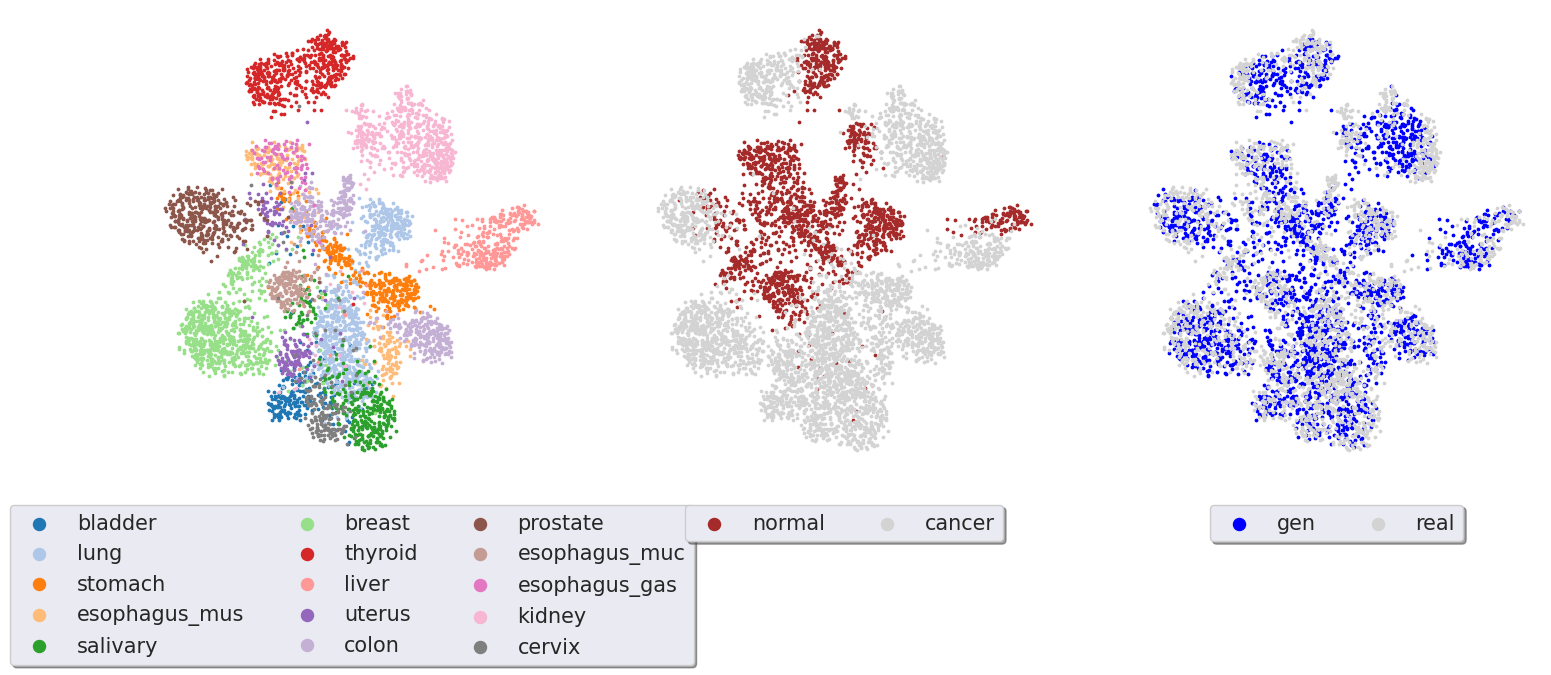

In [6]:
umap_plot_draw(X_test, x_syn, Y_test[:,0], Y_test[:,1], y_syn[:,0], y_syn[:,1], 600, 0.7)